In [9]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os

from classy import Class


params_lcdm = {
    'output':'lCl,tCl,mPk',
    'P_k_max_h/Mpc':1,
    'lensing':'y',
    'write background':'y',
    'input_verbose':10,
    'background_verbose':10,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
}

l_max_scalars = 2500
params_fe = {
    'output':'lCl,tCl,mPk',
    'P_k_max_h/Mpc':1,
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    # sigma, Lambda, alpha, phi'0, phi0, potential_type
    'parameters_smg':' 0.5,1.0,0.1,1.,1e-20,1',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
}

params_fe2 = {
    'output':'lCl,tCl,mPk',
    'P_k_max_h/Mpc':1,
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    'parameters_smg':' 0.5,1.0,0.5,1.,1e-20,1',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
}

params_fe3 = {
    'output':'lCl,tCl,mPk',
    'P_k_max_h/Mpc':1,
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    'parameters_smg':'1.,1.0,0.1,1.,1e-20,1',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
}

k = 1e-4*np.array(range(1,6001))
l = np.array(range(2,l_max_scalars+1))
factor = l*(l+1)/(2*np.pi)
ll = np.array(range(2,2501))
factorl = ll*(ll+1)/(2*np.pi)

cosmo = Class()

cosmo.set(params_fe3)
cosmo.compute()

bkg_fe3=cosmo.get_background()
#print(bkg_fe3.viewkeys())
print(cosmo.age())

prtt_fe3=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

raw_cl3 = cosmo.raw_cl(l_max_scalars)
#raw_cl2.viewkeys()

lensed_cl3 = cosmo.lensed_cl(2500)
#lensed_cl3.viewkeys()

PK3=np.zeros(6000)
for i in range (0,5999):
    PK3[i]=cosmo.pk(k[i],0)

cosmo.struct_cleanup()
cosmo.empty()









cosmo = Class()

cosmo.set(params_lcdm)
cosmo.compute()

bkg_lcdm=cosmo.get_background()
print("LCDM: " + str(cosmo.age()))

PK_lcdm=np.zeros(6000)
for i in range (0,5999):
    PK_lcdm[i]=cosmo.pk(k[i],0)

prtt_lcdm=cosmo.get_perturbations()
#print(prtt.viewkeys())
#prt_lcdm=prtt_lcdm['scalar']
#prt_lcdm0=prt_lcdm[0]
#prt_lcdm1=prt_lcdm[1]
#print(prt[0].viewkeys())

raw_cl_lcdm = cosmo.raw_cl(l_max_scalars)
lensed_cl_lcdm = cosmo.lensed_cl(2500)

cosmo.struct_cleanup()
cosmo.empty()



cosmo = Class()
cosmo.set(params_fe)
cosmo.compute()

bkg_fe=cosmo.get_background()
#print(bkg_fe.viewkeys())
print(cosmo.age())

prtt_fe=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

l = np.array(range(2,l_max_scalars+1))
factor = l*(l+1)/(2*np.pi)
ll = np.array(range(2,2501))
factorl = ll*(ll+1)/(2*np.pi)
raw_cl = cosmo.raw_cl(l_max_scalars)
#raw_cl.viewkeys()

lensed_cl = cosmo.lensed_cl(2500)
#lensed_cl.viewkeys()

k = 1e-4*np.array(range(1,6001))
PK=np.zeros(6000)
for i in range (0,5999):
    PK[i]=cosmo.pk(k[i],0)

cosmo.struct_cleanup()
cosmo.empty()






cosmo.set(params_fe2)
cosmo.compute()

bkg_fe2=cosmo.get_background()
#print(bkg_fe2.viewkeys())
print(cosmo.age())

prtt_fe2=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

raw_cl2 = cosmo.raw_cl(l_max_scalars)
#raw_cl2.viewkeys()

lensed_cl2 = cosmo.lensed_cl(2500)
#lensed_cl2.viewkeys()

PK2=np.zeros(6000)
for i in range (0,5999):
    PK2[i]=cosmo.pk(k[i],0)

cosmo.struct_cleanup()
cosmo.empty()

13.47390800953014
LCDM: 13.808712383316225
13.738067654938513
13.534375081147134


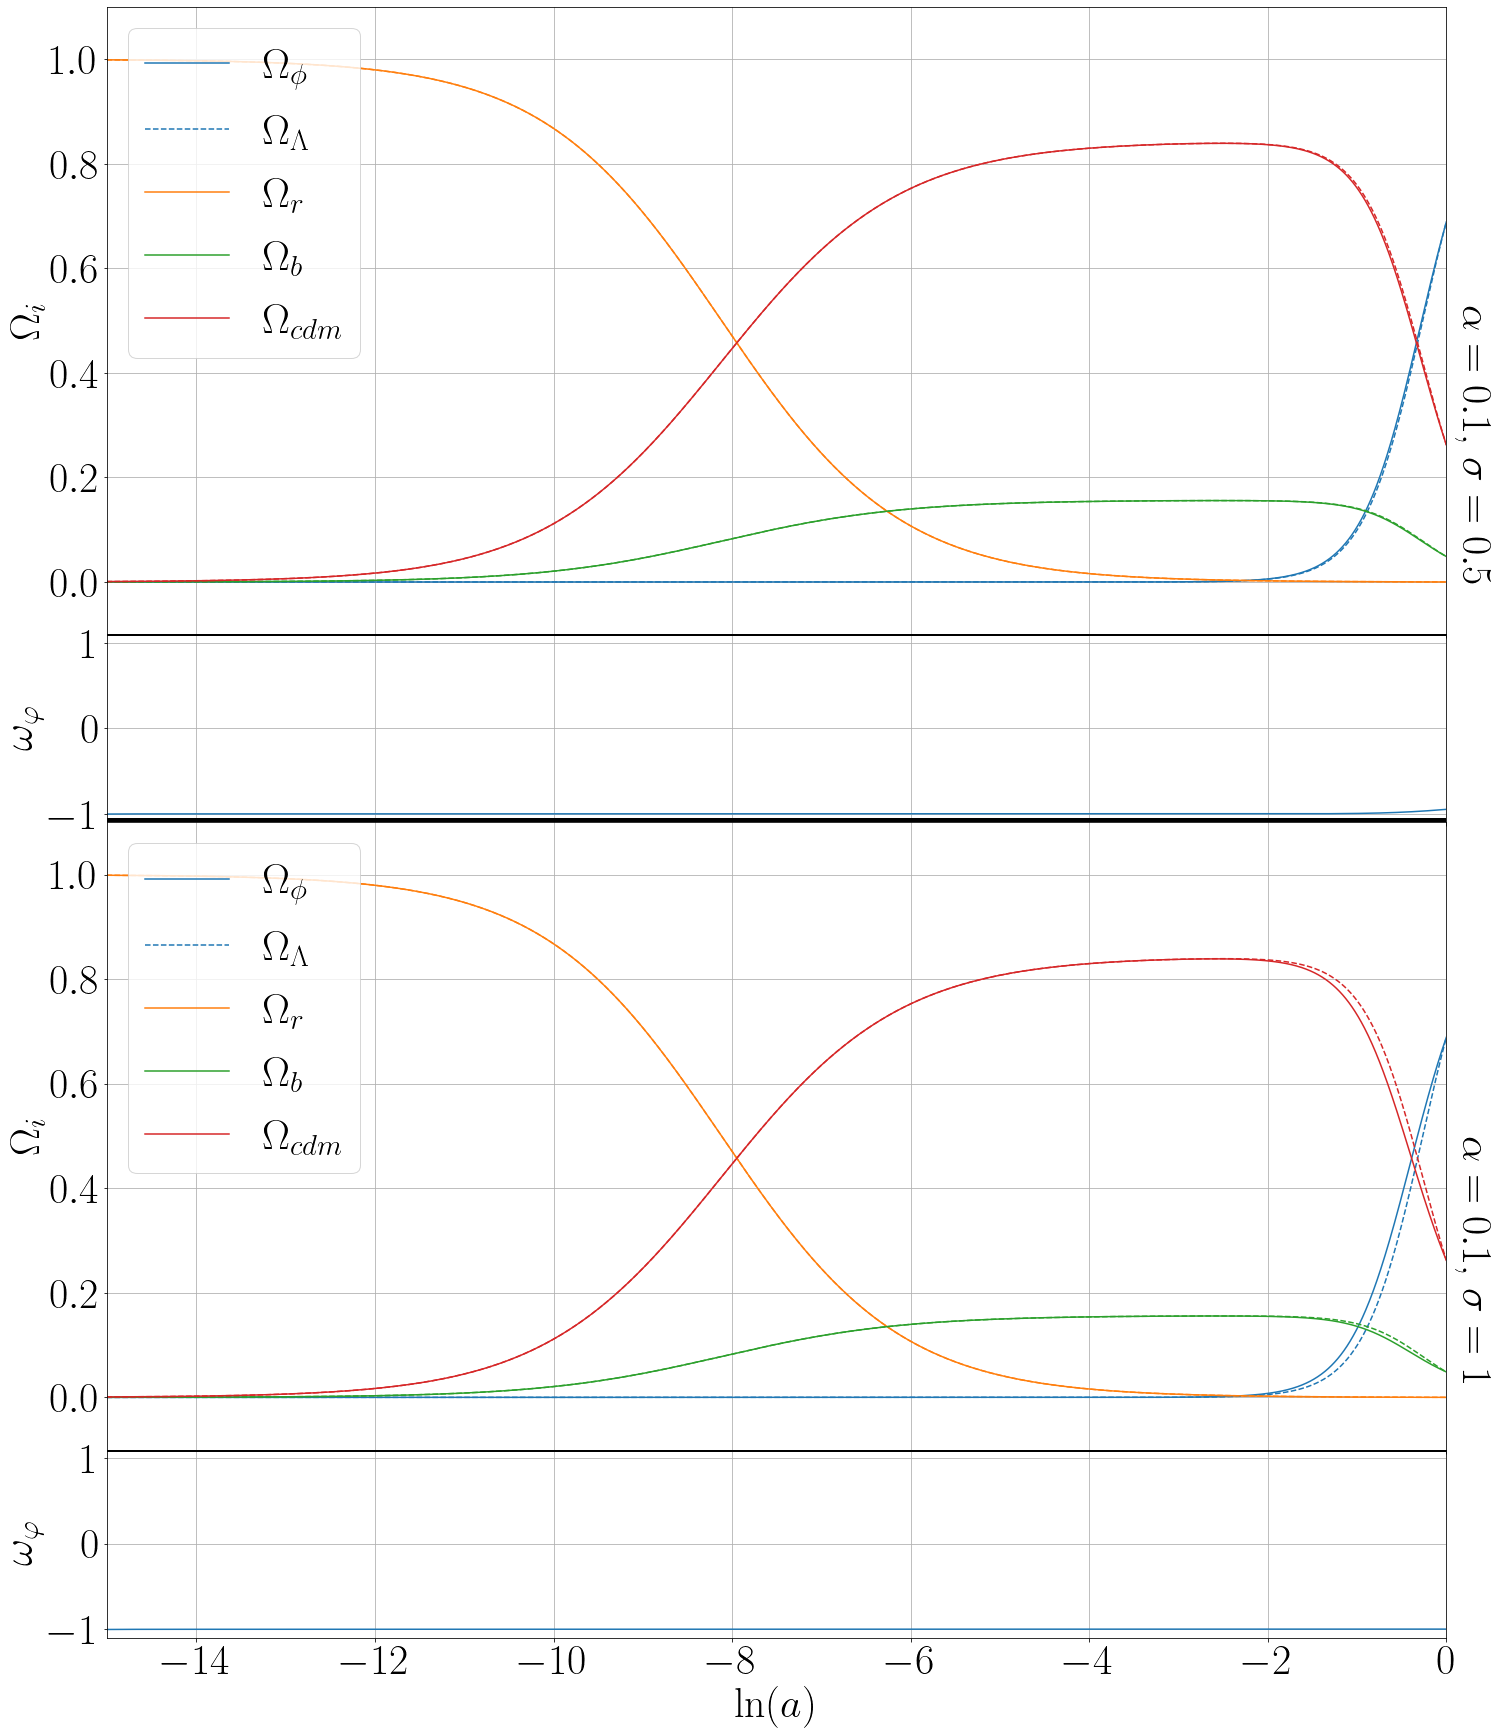

In [10]:
text_size=42
fig_size_x=24
fig_size_y=14

N_last = - 15

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

borders=[-15,0,-0.1,1.1]

f, (ax1, ax1_w, ax2, ax2_w) = plt.subplots(4, sharex=True, sharey=False ,figsize=(24,30),gridspec_kw = {'height_ratios':[1,0.3,1,0.3]})
p1=ax1.plot(np.log(1/(1+bkg_fe['z'])),bkg_fe['(.)rho_smg']/bkg_fe['(.)rho_crit'],label='$\Omega_{\phi}$')
color=p1[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_lambda'])/bkg_lcdm['(.)rho_crit'],linestyle='--',label='$\Omega_\Lambda$',color=color)
p2=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_g']+bkg_fe['(.)rho_ur'])/bkg_fe['(.)rho_crit'],label='$\Omega_{r}$')
color=p2[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_g']+bkg_lcdm['(.)rho_ur'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p3=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_b'])/bkg_fe['(.)rho_crit'],label='$\Omega_{b}$')
color=p3[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_b'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p4=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_cdm'])/bkg_fe['(.)rho_crit'],label='$\Omega_{cdm}$')
color=p4[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_cdm'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)

ax1.set_ylabel("$\Omega_i$")
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.axis([N_last,0,-0.1,1.1])
ax1.set_xlim(-15,0)

p1_w=ax1_w.plot(np.log(1/(1+bkg_fe['z'])),bkg_fe['(.)p_smg']/bkg_fe['(.)rho_smg'])
ax1_w.set_ylabel("$\omega_\\varphi$")
ax1_w.grid(True)
ax1_w.axhline(1.1, color="black", linewidth=4)
ax1_w.axhline(-1.1, color="black", linewidth=8)
ax1_w.axis([N_last,0,-1.1,1.1])

left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
ax1.text(1.02, 0.3*(bottom+top), '$\\alpha = 0.1$,  $\\sigma = 0.5$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=ax1.transAxes)

p1=ax2.plot(np.log(1/(1+bkg_fe3['z'])),bkg_fe3['(.)rho_smg']/bkg_fe3['(.)rho_crit'],label='$\Omega_{\phi}$')
color=p1[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_lambda'])/bkg_lcdm['(.)rho_crit'],linestyle='--',label='$\Omega_\Lambda$',color=color)
p2=ax2.plot(np.log(1/(1+bkg_fe3['z'])),(bkg_fe3['(.)rho_g']+bkg_fe3['(.)rho_ur'])/bkg_fe3['(.)rho_crit'],label='$\Omega_{r}$')
color=p2[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_g']+bkg_lcdm['(.)rho_ur'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p3=ax2.plot(np.log(1/(1+bkg_fe3['z'])),(bkg_fe3['(.)rho_b'])/bkg_fe3['(.)rho_crit'],label='$\Omega_{b}$')
color=p3[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_b'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p4=ax2.plot(np.log(1/(1+bkg_fe3['z'])),(bkg_fe3['(.)rho_cdm'])/bkg_fe3['(.)rho_crit'],label='$\Omega_{cdm}$')
color=p4[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_cdm'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
#ax2.set_xlabel("log($a$)")
ax2.set_ylabel("$\Omega_i$")
ax2.legend(loc='upper left')
ax2.grid(True)
ax2.axis([N_last,0,-0.1,1.1])

ax2.text(1.02, 0.3*(bottom+top), '$\\alpha = 0.1$,  $\\sigma = 1$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=ax2.transAxes)

p2_w=ax2_w.plot(np.log(1/(1+bkg_fe2['z'])),bkg_fe2['(.)p_smg']/bkg_fe2['(.)rho_smg'])
ax2_w.set_ylabel("$\omega_\\varphi$")
ax2_w.set_xlabel("ln($a$)")
ax2_w.axhline(1.1, color="black", linewidth=4)
ax2_w.grid(True)
ax2_w.axis([N_last,0,-1.1,1.1])

f.subplots_adjust(hspace=0)
f.figsize=(24,24)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

#plt.savefig('/Users/Alessandro/Documents/Google Drive/Uni/Laurea Magistrale/Prova finale/Tesi/Img/jupyter/quint_density.eps',bbox_inches='tight',format='eps',dpi=1000)
#plt.savefig('/Users/Alessandro/Documents/Google Drive/Uni/Laurea Magistrale/Prova finale/Tesi/Img/jupyter/quint_density.pdf',bbox_inches='tight')

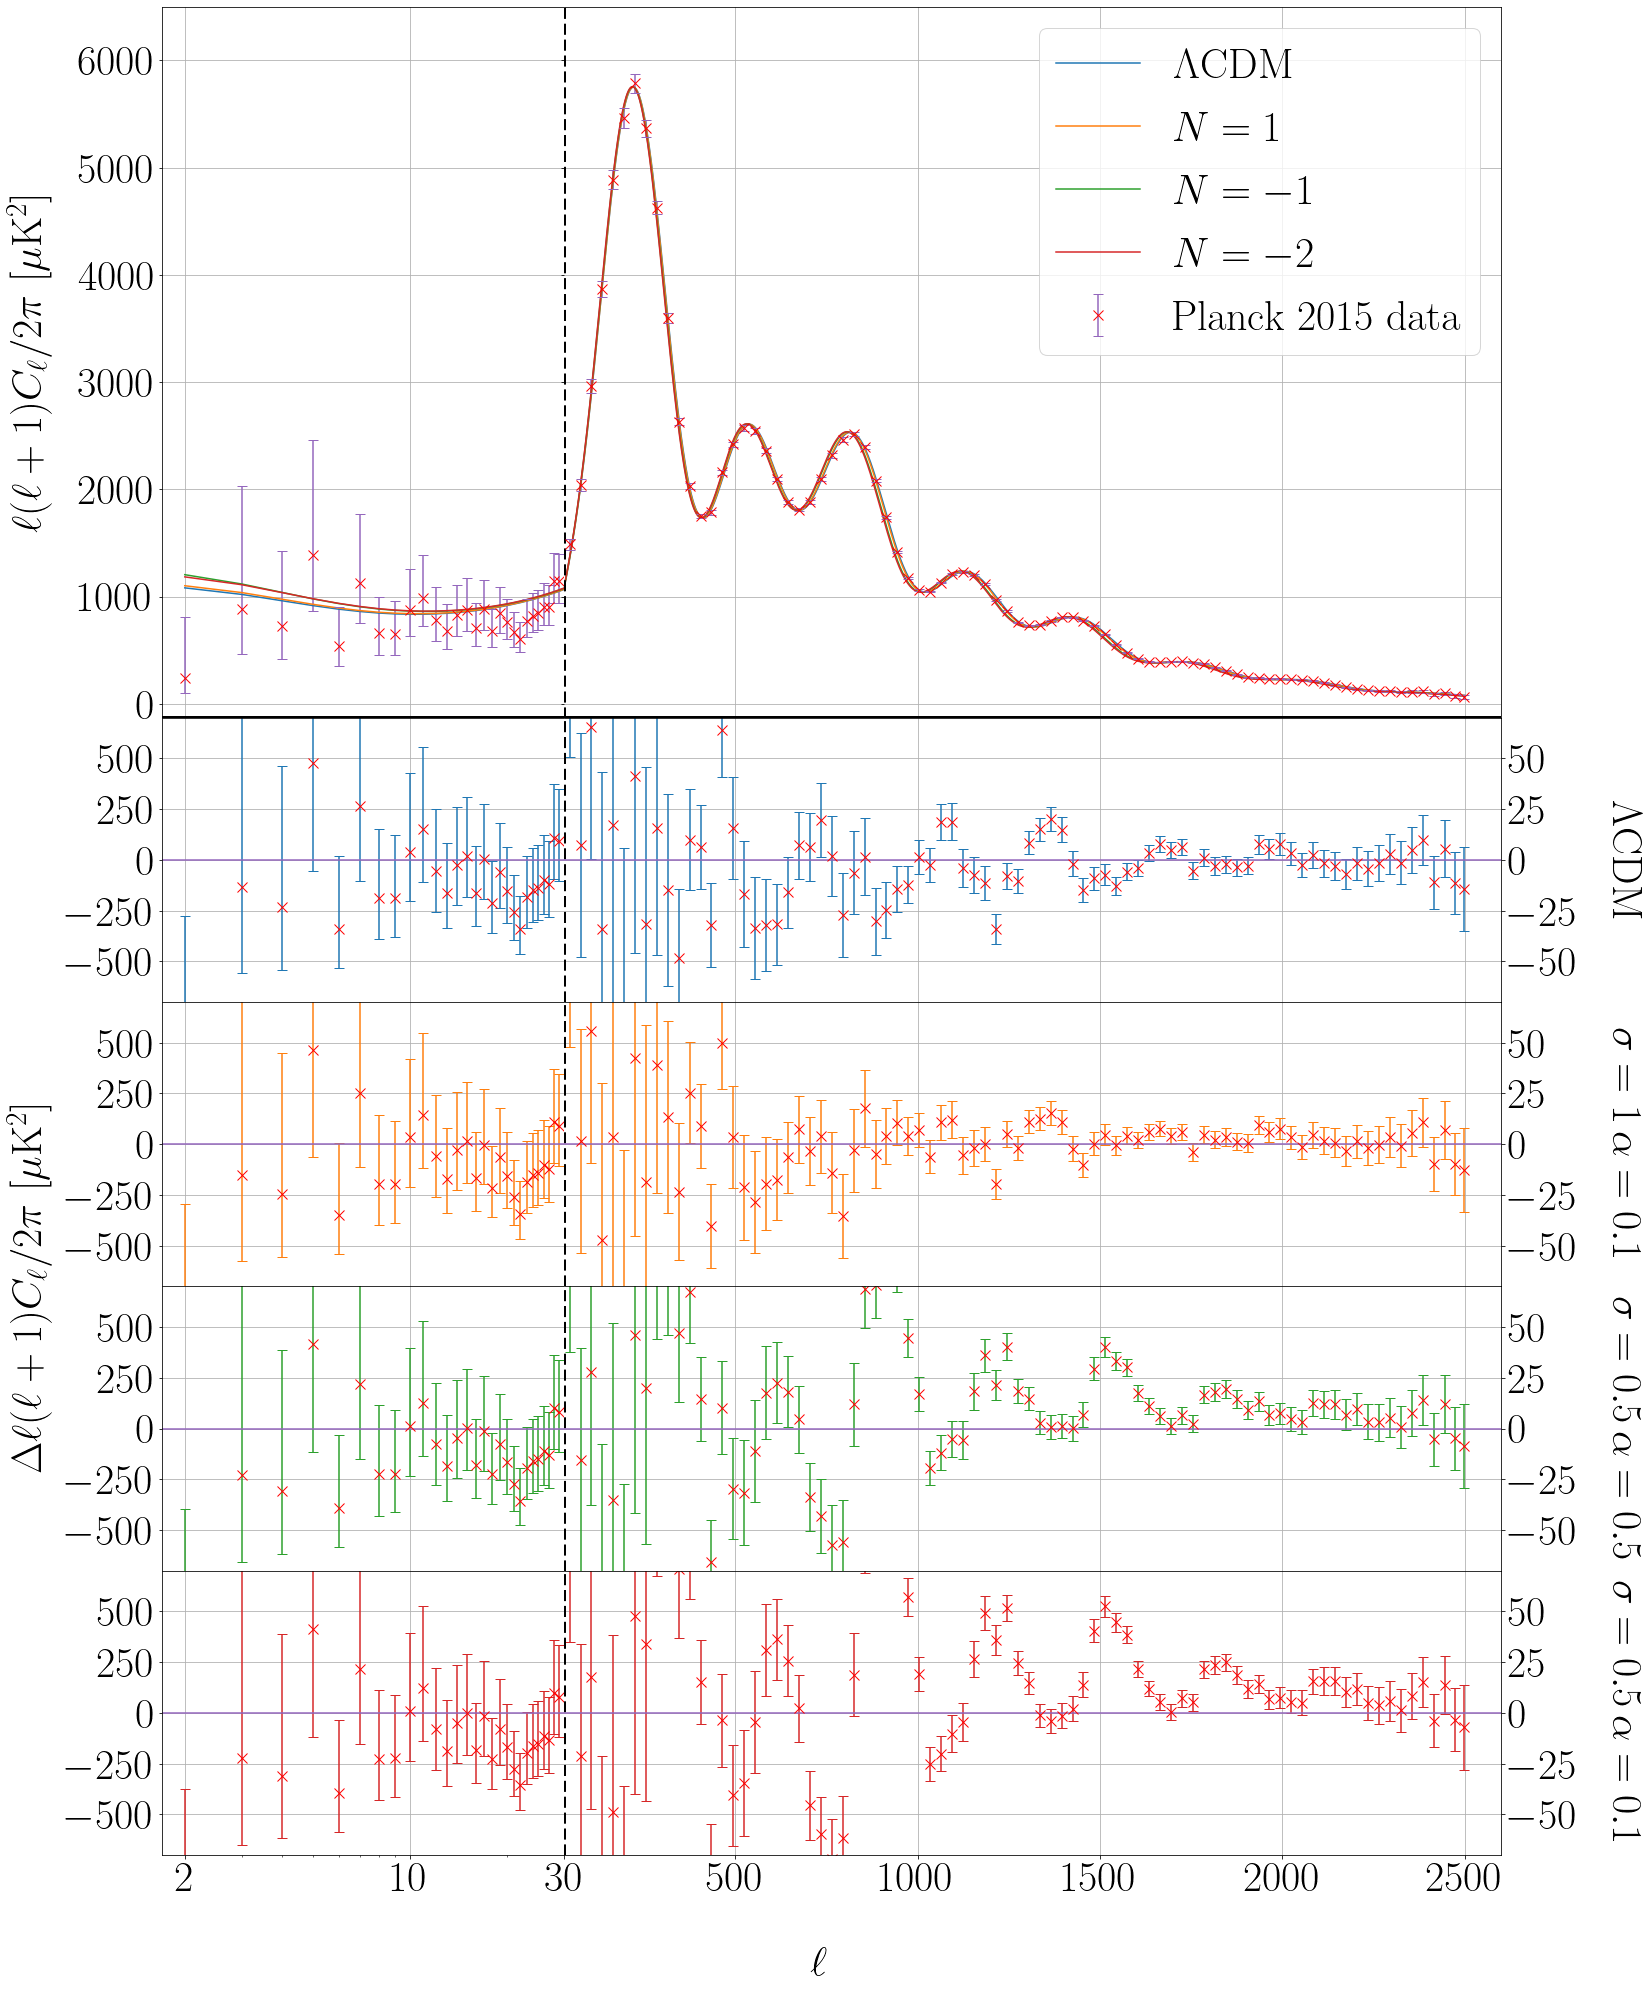

In [53]:
#T0=2.7255
text_size=42
fig_size_x=24
fig_size_y=14

T0=2.7255

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

filename = 'data/COM_PowerSpect_CMB-TT-hiL-binned_R2.02.txt'
data1=np.genfromtxt(filename, delimiter='', comments='#');

ELL = np.asarray(data1[:,0])
LMIN=np.asarray(data1[:,1]) 
LMAX=np.asarray(data1[:,2])
D_EE=np.asarray(data1[:,3])#muKcmb^2
ERR=np.asarray(data1[:,4])#muKcmb^2

filename = 'data/COM_PowerSpect_CMB-TT-loL-full_R2.02.txt'
data2=np.genfromtxt(filename, delimiter='', comments='#');

ELL2 = np.asarray(data2[:,0])
D_ELL2=np.asarray(data2[:,1])#muKcmb^2
ERRUP2=np.asarray(data2[:,2])#muKcmb^2
ERRDOWN2=np.asarray(data2[:,3])#muKcmb^2

text_size=26
fig_size_x=24
fig_size_y=34

f,axarr = plt.subplots(5,2,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w',gridspec_kw = {'width_ratios':[0.3,0.7],'height_ratios':[1, 0.4,0.4,0.4,0.4]})

p1=axarr[0,1].plot(ll,factorl*lensed_cl_lcdm['tt'][2:]*T0*T0/pow(10,-12),label='$\Lambda$CDM')
color_lcdm=p1[0].get_color()
p2=axarr[0,1].plot(l,factor*lensed_cl['tt'][2:]*T0*T0/pow(10,-12),label='$N=1$')
color1=p2[0].get_color()
p3=axarr[0,1].plot(l,factor*lensed_cl2['tt'][2:]*T0*T0/pow(10,-12),label='$N=-1$')
color2=p3[0].get_color()
p4=axarr[0,1].plot(l,factor*lensed_cl3['tt'][2:]*T0*T0/pow(10,-12),label='$N=-2$')
color3=p4[0].get_color()
p5=axarr[0,1].errorbar(ELL,D_EE,yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,label='Planck 2015 data')
color_error=p5[0].get_color()

axarr[0,0].set_xscale("log")

axarr[0,0].plot(ll,factorl*lensed_cl_lcdm['tt'][2:]*T0*T0/pow(10,-12),label='$\Lambda$CDM')
axarr[0,0].plot(l,factor*lensed_cl['tt'][2:]*T0*T0/pow(10,-12),label='$N=1$')
axarr[0,0].plot(l,factor*lensed_cl2['tt'][2:]*T0*T0/pow(10,-12),label='$N=-1$')
axarr[0,0].plot(l,factor*lensed_cl3['tt'][2:]*T0*T0/pow(10,-12),label='$N=-2$')
axarr[0,0].errorbar(ELL2,D_ELL2,yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,label='Planck data')

asse_max_l=2600

axarr[0,0].set_xlim(1.7,30)
axarr[0,1].set_xlim(30,asse_max_l)

axarr[0,1].set_ylim(-130,6500)
axarr[0,0].set_ylim(-130,6500)

axarr[0,0].grid(True)
axarr[0,1].grid(True)

axarr[0,1].legend()

customticks2=[2,10,30]
axarr[0,0].set_xticks(customticks2)
axarr[0,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

l_m=30
axarr[0,1].axvline(l_m, color="black", linestyle="--", linewidth=3)

# hide the spines between ax and ax2
axarr[0,0].spines['right'].set_visible(False)
axarr[0,1].spines['left'].set_visible(False)
axarr[0,1].axes.yaxis.set_ticklabels([])
axarr[0,1].yaxis.tick_left()
axarr[0,1].tick_params(labelright='off')

#f.text(0.5, 0.07, '$\ell$', va='center')
#axarr[0,0].set_ylabel("$\ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")
















def rel_diff(x1, y1, x2, y2, N=3e3, spacing = 'linear', epsilon=1e-5, ref = 0):
   """ NO(Relative)NO - THIS IS THE difference between data vectors (MODIFIED)

   Args:
       x1,y1,x2,y2 (np array): data to interpolate.
       N (int): number of points on which to interpolate.
       spacing (str): how to populate the interpolation (log or linear).
       epsilon (float): cut the interval to avoid interpolation problems.
       ref (int): if 0 the rel diff is calculated using N points with linear or log spacing, if 1 (2) the rel diff is calculated only at the points of model 1 (2).

   Returns:
       [x,y]: arrays with the relative difference.

   """

   diff = []

   #don't compute it many times, slow for long arrays
   xmin = (1.+0*epsilon)*max(min(x1),min(x2))
   xmax = (1.-0*epsilon)*min(max(x1),max(x2))

   data1 = interpolate.interp1d(x1,y1)
   data2 = interpolate.interp1d(x2,y2)

   if ref == 1:
       therange = [x for x in x1 if xmin<=x<=xmax]
   elif ref == 2:
       therange = [x for x in x2 if xmin<=x<=xmax]
   else:
       if spacing == 'linear':
           therange = np.linspace(xmin,xmax,N)
       else:
           therange = np.exp(np.linspace(np.log(xmin),np.log(xmax),N))

   #print therange
   for x in therange:
       diff.append((data1(x)-data2(x)))

   return [np.array(therange),np.array(diff)]

#?rel_diff






















limite_asse=700
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height




axarr[1,0].set_xscale("log")

customticks2=[2,10,30]
axarr[1,0].set_xticks(customticks2)
axarr[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
customticks=[500,250,0,-250,-500]
axarr[1,0].set_yticks(customticks)
customticks=[50,25,0,-25,-50]
axarr[1,1].set_yticks(customticks)

axarr[1,0].errorbar(rel_diff(ELL2, D_ELL2,ll,factorl*lensed_cl_lcdm['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL2, D_ELL2,ll,factorl*lensed_cl_lcdm['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color_lcdm)

axarr[1,1].errorbar(rel_diff(ELL, D_EE,ll,factorl*lensed_cl_lcdm['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL, D_EE,ll,factorl*lensed_cl_lcdm['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color_lcdm)

axarr[1,0].set_xlim(1.7,30)
axarr[1,1].set_xlim(30,asse_max_l)

axarr[1,1].set_ylim(-limite_asse/10,limite_asse/10)
axarr[1,0].set_ylim(-limite_asse,limite_asse)

axarr[1,0].grid(True)
axarr[1,1].grid(True)

#plt.legend()

l_m=30
axarr[1,1].axvline(l_m, color="black", linestyle="--", linewidth=3)
axarr[1,0].axhline(0, color=color_error, linestyle="-")
axarr[1,1].axhline(0, color=color_error, linestyle="-")

# hide the spines between ax and ax2
axarr[1,0].spines['right'].set_visible(False)
axarr[1,1].spines['left'].set_visible(False)
#axarr[1,1].axes.yaxis.set_ticklabels([])
axarr[1,0].yaxis.tick_left()
axarr[1,1].yaxis.tick_right()
axarr[1,0].tick_params(labelright='off')

#axarr[1,0].set_ylabel("$\Delta \ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")






axarr[2,0].set_xscale("log")

customticks2=[2,10,30]
axarr[2,0].set_xticks(customticks2)
axarr[2,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
customticks=[500,250,0,-250,-500]
axarr[2,0].set_yticks(customticks)
customticks=[50,25,0,-25,-50]
axarr[2,1].set_yticks(customticks)

axarr[2,0].errorbar(rel_diff(ELL2, D_ELL2,l,factor*lensed_cl['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL2, D_ELL2,l,factor*lensed_cl['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color1)

axarr[2,1].errorbar(rel_diff(ELL, D_EE,l,factor*lensed_cl['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL, D_EE,l,factor*lensed_cl['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color1)


axarr[2,0].set_xlim(1.7,30)
axarr[2,1].set_xlim(30,asse_max_l)

axarr[2,1].set_ylim(-limite_asse/10,limite_asse/10)
axarr[2,0].set_ylim(-limite_asse,limite_asse)

axarr[2,0].grid(True)
axarr[2,1].grid(True)

#plt.legend()

l_m=30
axarr[2,1].axvline(l_m, color="black", linestyle="--", linewidth=3)
axarr[2,0].axhline(0, color=color_error, linestyle="-")
axarr[2,1].axhline(0, color=color_error, linestyle="-")

# hide the spines between ax and ax2
axarr[2,0].spines['right'].set_visible(False)
axarr[2,1].spines['left'].set_visible(False)
#axarr[2,1].axes.yaxis.set_ticklabels([])
axarr[2,0].yaxis.tick_left()
axarr[2,1].yaxis.tick_right()
axarr[2,0].tick_params(labelright='off')

#axarr[2,0].set_ylabel("$\Delta \ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")



axarr[3,0].set_xscale("log")

customticks2=[2,10,30]
axarr[3,0].set_xticks(customticks2)
axarr[3,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
customticks=[500,250,0,-250,-500]
axarr[3,0].set_yticks(customticks)
customticks=[50,25,0,-25,-50]
axarr[3,1].set_yticks(customticks)

axarr[3,0].errorbar(rel_diff(ELL2, D_ELL2,l,factor*lensed_cl2['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL2, D_ELL2,l,factor*lensed_cl2['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color2)
axarr[3,1].errorbar(rel_diff(ELL, D_EE,l,factor*lensed_cl2['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL, D_EE,l,factor*lensed_cl2['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color2)



axarr[3,0].set_xlim(1.7,30)
axarr[3,1].set_xlim(30,asse_max_l)

axarr[3,1].set_ylim(-limite_asse/10,limite_asse/10)
axarr[3,0].set_ylim(-limite_asse,limite_asse)

axarr[3,0].grid(True)
axarr[3,1].grid(True)

#plt.legend()

l_m=30
axarr[3,1].axvline(l_m, color="black", linestyle="--", linewidth=3)
axarr[3,0].axhline(0, color=color_error, linestyle="-")
axarr[3,1].axhline(0, color=color_error, linestyle="-")

# hide the spines between ax and ax2
axarr[3,0].spines['right'].set_visible(False)
axarr[3,1].spines['left'].set_visible(False)
#axarr[3,1].axes.yaxis.set_ticklabels([])
axarr[3,0].yaxis.tick_left()
axarr[3,1].yaxis.tick_right()
axarr[3,0].tick_params(labelright='off')

#axarr[3,0].set_ylabel("$\Delta \ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")


axarr[4,0].set_xscale("log")

customticks=[500,250,0,-250,-500]
axarr[4,0].set_yticks(customticks)
customticks=[50,25,0,-25,-50]
axarr[4,1].set_yticks(customticks)

axarr[4,0].errorbar(rel_diff(ELL2, D_ELL2,l,factor*lensed_cl3['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL2, D_ELL2,l,factor*lensed_cl3['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color3)
axarr[4,1].errorbar(rel_diff(ELL, D_EE,l,factor*lensed_cl3['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL, D_EE,l,factor*lensed_cl3['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color3)



axarr[4,0].set_xlim(1.7,30)
axarr[4,1].set_xlim(30,asse_max_l)

axarr[4,1].set_ylim(-limite_asse/10,limite_asse/10)
axarr[4,0].set_ylim(-limite_asse,limite_asse)

axarr[4,0].grid(True)
axarr[4,1].grid(True)

#plt.legend()

l_m=30
axarr[4,1].axvline(l_m, color="black", linestyle="--", linewidth=3)
axarr[4,0].axhline(0, color=color_error, linestyle="-")
axarr[4,1].axhline(0, color=color_error, linestyle="-")

# hide the spines between ax and ax2
axarr[4,0].spines['right'].set_visible(False)
axarr[4,1].spines['left'].set_visible(False)
#axarr[4,1].axes.yaxis.set_ticklabels([])
axarr[4,0].yaxis.tick_left()
axarr[4,1].yaxis.tick_right()
axarr[4,0].tick_params(labelright='off')

f.text(0.5, 0.08, '$\ell$', va='center')
#axarr[4,0].set_ylabel("$\Delta \ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")

axarr[4,1].text(1.13, 0.5*(bottom+top), '$\\sigma=0.5 \,\\alpha=0.1$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=axarr[4,1].transAxes)
axarr[2,1].text(1.13, 0.5*(bottom+top), '$\\sigma=0.5 \,\\alpha=0.5$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=axarr[3,1].transAxes)
axarr[3,1].text(1.13, 0.5*(bottom+top), '$\\sigma=1 \,\\alpha=0.1$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=axarr[2,1].transAxes)
axarr[1,1].text(1.13, 0.5*(bottom+top), '$\Lambda$CDM', horizontalalignment='center', verticalalignment='center', rotation=270, transform=axarr[1,1].transAxes)


axarr[2,0].text(-0.33, 0.0*(bottom+top), "$\Delta \ell (\ell+1) C_\ell /2\pi$ $[\mu$K$^2]$", horizontalalignment='center', verticalalignment='center', rotation=90, transform=axarr[2,0].transAxes)
axarr[0,0].text(-0.33, 0.5*(bottom+top), "$\ell (\ell+1) C_\ell /2\pi$ $[\mu$K$^2]$", horizontalalignment='center', verticalalignment='center', rotation=90, transform=axarr[0,0].transAxes)

axarr[0,0].axhline(-130, color="black", linewidth=4)
axarr[0,1].axhline(-130, color="black", linewidth=4)





f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

customticks2=[2,10,30]
axarr[4,0].set_xticks(customticks2)
axarr[4,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_99546/1160248044.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axarr[0].set_ylim(0,7e5)
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_99546/1160248044.py:29: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(k,(PK-PK_lcdm)/PK_lcdm)
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_99546/1160248044.py:31: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(k,(PK2-PK_lcdm)/PK_lcdm)
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_99546/1160248044.py:33: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(k,(PK3-PK_lcdm)/PK_lcdm)


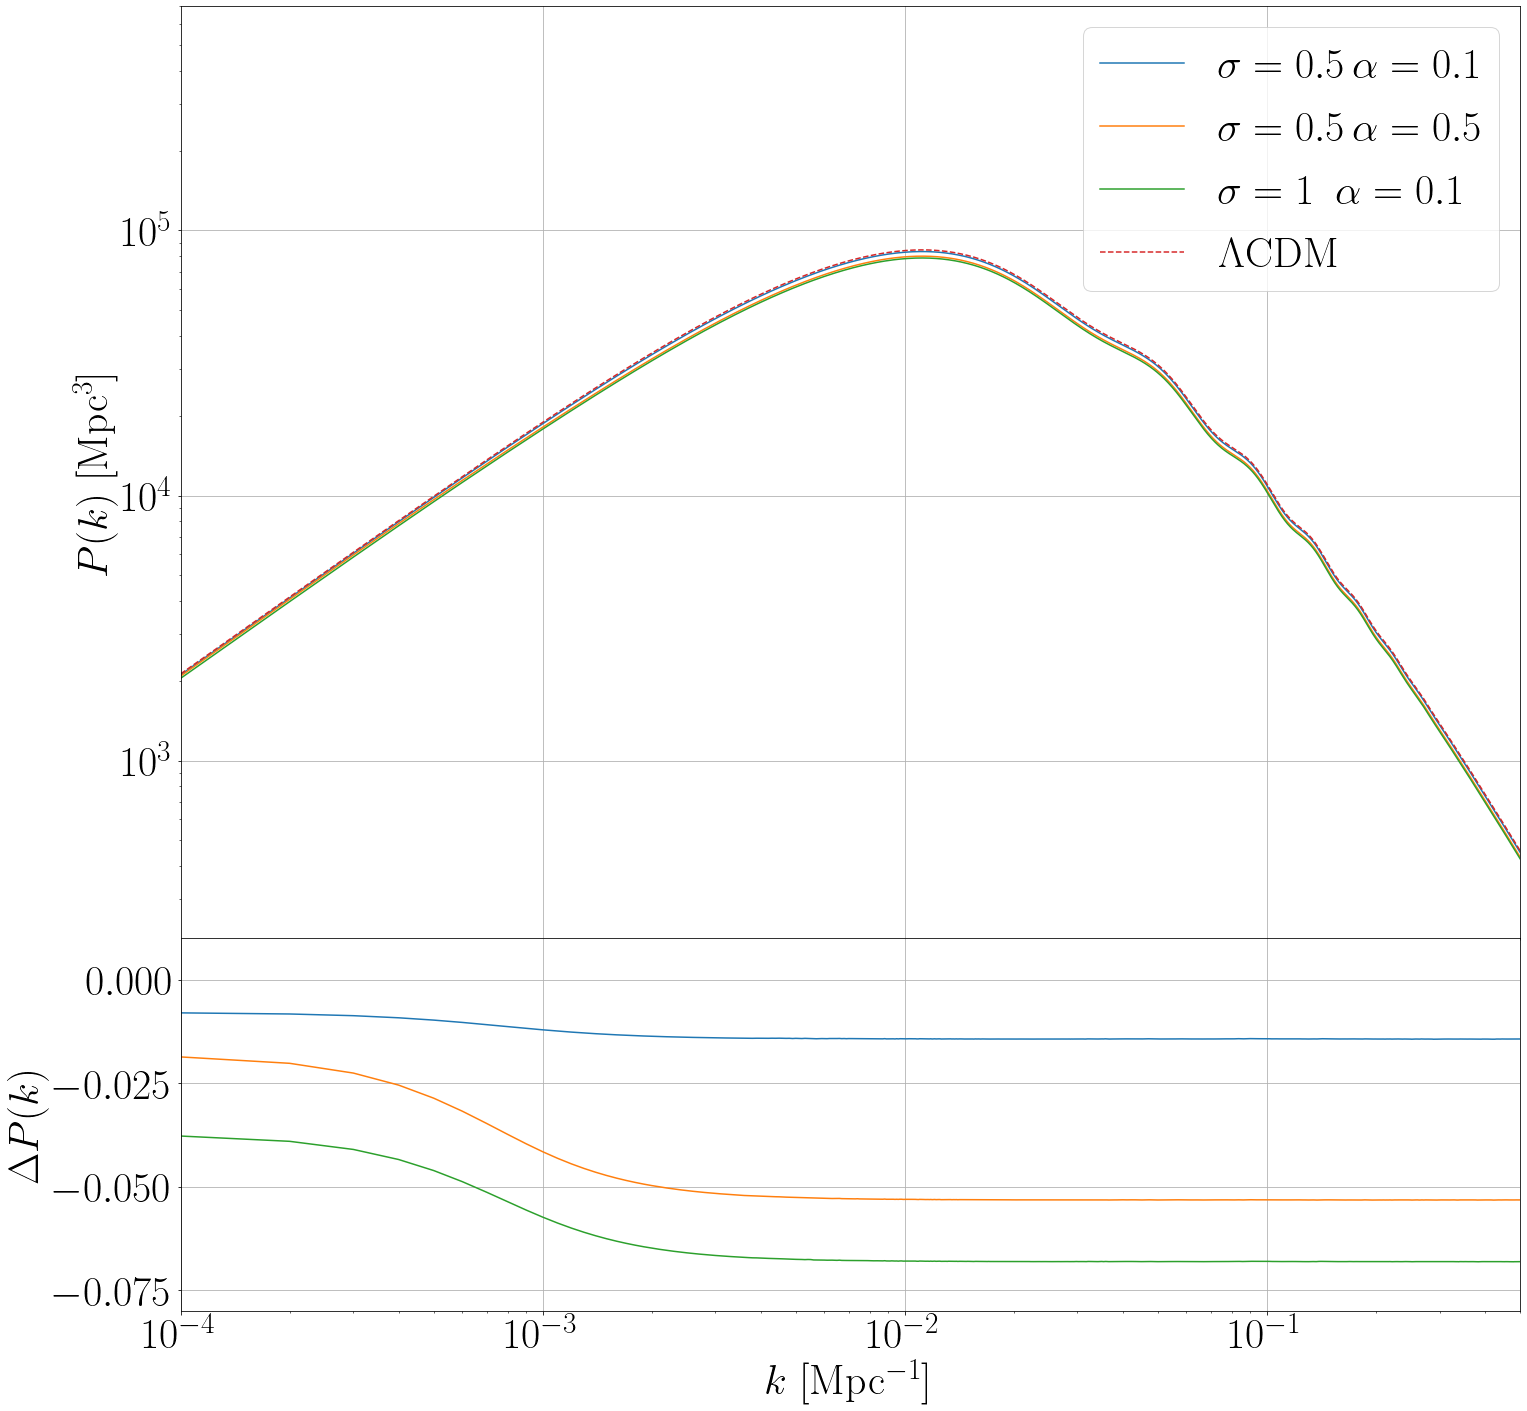

In [52]:
text_size=42
fig_size_x=24
fig_size_y=24

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)


f,axarr = plt.subplots(2,1,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w',gridspec_kw = {'height_ratios':[1, 0.4]})

axarr[0].loglog(k,PK,label='$\\sigma=0.5 \,\\alpha=0.1$')
axarr[0].loglog(k,PK2,label='$\\sigma=0.5 \,\\alpha=0.5$')
axarr[0].loglog(k,PK3,label='$\\sigma=1 \,\,\,\\alpha=0.1$')
axarr[0].loglog(k,PK_lcdm,'--',label='$\Lambda$CDM')
#plt.xlim(-10,0)
axarr[0].set_ylim(0,7e5)
axarr[0].set_xlim(1e-4,0.5)
axarr[0].legend()
#plt.title("$k=0.1$")
axarr[0].set_ylabel("$P(k)$ [Mpc$^{3}$]")
axarr[0].set_xlabel("$k$")

axarr[0].grid(True)

axarr[1].semilogx(k,(PK-PK_lcdm)/PK_lcdm)

axarr[1].semilogx(k,(PK2-PK_lcdm)/PK_lcdm)

axarr[1].semilogx(k,(PK3-PK_lcdm)/PK_lcdm)

axarr[1].grid(True)

axarr[1].set_ylabel("$\\Delta P(k)$")
axarr[1].set_xlabel("$k$ [Mpc$^{-1}$]")

axarr[1].set_xlim(1e-4,0.5)
axarr[1].set_ylim(-0.08,0.01)

customticks2=[1e-3,1e-2,1e-1]
axarr[0].set_xticks(customticks2)

f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)